# Image Segmentation using KMeans


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
im=cv2.imread('roshni1.jpg')

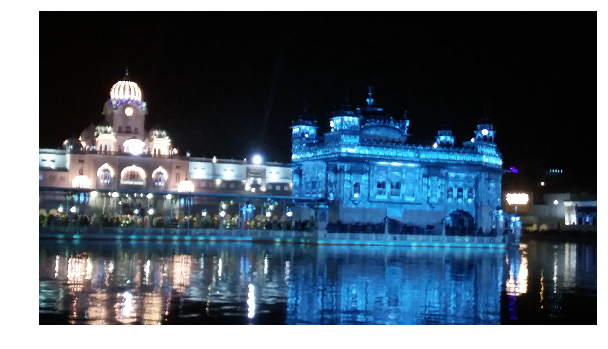

In [3]:
plt.figure(0,figsize=(10,8))
plt.imshow(im)
plt.axis("off")
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
r, g, b = cv2.split(im)
r = r.flatten()
g = g.flatten()
b = b.flatten()
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()
img = cv2.imread('colors.jpg')

#convert from BGR to RGB
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#get rgb values from image to 1D array
#r, g, b = cv2.split(img)
#r = r.flatten()
#g = g.flatten()
#b = b.flatten()

#plotting 
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter(r, g, b)
#plt.show()

In [21]:
original_shape=im.shape
print(original_shape)

(2322, 4128, 3)


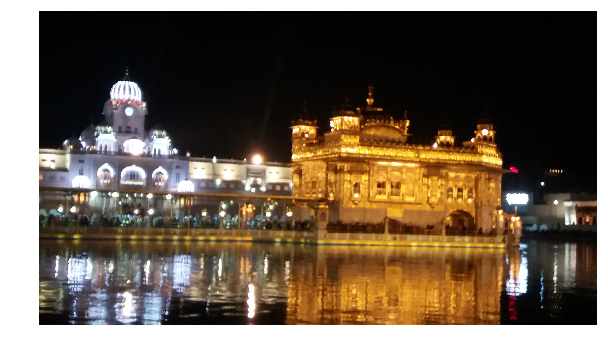

In [22]:
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)  # conversion of bgr to rgb
plt.figure(0,figsize=(10,8))
plt.imshow(im)
plt.axis("off")
plt.show()

In [23]:
print(im.shape)

(2322, 4128, 3)


# flatten the image

In [29]:
im=im.reshape((-1,3)) #-1 when we dont know the dimension

In [30]:
im.shape

(9585216, 3)

# KMEANS

In [8]:
from sklearn.cluster import KMeans

In [9]:
dominant_color=6


In [10]:
km=KMeans(n_clusters=dominant_color)

In [ ]:
km.fit(im)

In [ ]:
km.cluster_centers_

In [ ]:
km.labels_

In [ ]:
centers=km.cluster_centers_
centers=np.array(centers,dtype="uint8")#center ofmas of cv2

In [ ]:
centers

# plot of dominant colors

In [ ]:
i=1
colors=[]
plt.figure(0,figsize=(8,2))
for kx in centers:
    plt.subplot(1,6,i)
    i+=1
    plt.axis("off")
    
    colors.append(kx)
    a=np.zeros((100,100,3),dtype="uint8")
    a[:,:,:]=kx
    plt.imshow(a)
plt.show()

In [ ]:
colors

In [ ]:
# these are the predicted labels of all pixels : telling us eac pixel belongs to which cluster 
# or class
np.unique(km.labels_)

In [ ]:
km.labels_.shape

we will assign the pixel of our original image to predicted labels ---->> image segmentation

In [ ]:
new_img=np.zeros((km.labels_.shape[0],3),dtype="uint8")

In [ ]:
for pixel in range(new_img.shape[0]):
    new_img[pixel]=colors[km.labels_[pixel]]
new_img=new_img.reshape((original_shape))
plt.figure(0,figsize=(10,8))
plt.imshow(new_img)
plt.axis("off")
plt.show()